In [12]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [4]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [7]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head()

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0
4,1.81,71.0,0,0,0


In [14]:
le = LabelEncoder()
le.fit( data['sex'] )
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [15]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Оценка качества

In [16]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [17]:
tp, fp, fn, tn

(1406, 352, 389, 1111)

In [18]:
precision = tp / (tp + fp)
precision

0.7997724687144482

In [19]:
recall = tp / (tp + fn)
recall

0.7832869080779944

In [20]:
fpr = fp/(fp+tn)
fpr

0.24060150375939848

In [21]:
tpr = tp/(tp+fn)
tpr

0.7832869080779944

In [41]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

tpr_all =[]
fpr_all =[]

precision_all = []
recall_all = []

for i in np.arange(0, 1, 0.01):
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):
        if predicted_prob >= i:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
                
    precision = tp / (tp + fp)
    precision_all.append(precision)
    
    recall = tp / (tp + fn)
    recall_all.append(recall)
    
    fpr = fp/(fp+tn)
    tpr = tp/(tp+fn)
    fpr_all.append(fpr)
    tpr_all.append(tpr)

No handles with labels found to put in legend.


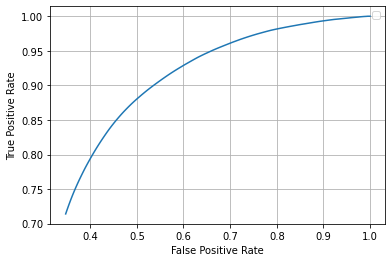

In [35]:
plt.plot( fpr_all, tpr_all )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.grid()
plt.show()

No handles with labels found to put in legend.


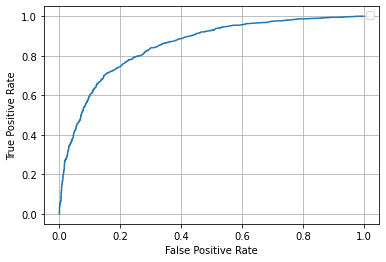

In [38]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])
plt.plot( fpr, tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.grid()
plt.show()

No handles with labels found to put in legend.


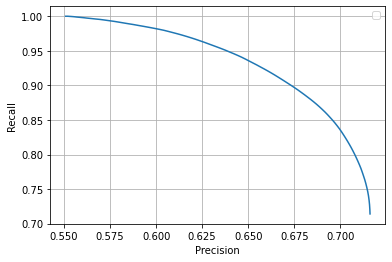

In [42]:
plt.plot( precision_all, recall_all )

plt.xlabel('Precision')
plt.ylabel('Recall')

plt.legend( loc = 0 )
plt.grid()
plt.show()

In [44]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )
for line in zip( pr[:10], re[:10], thres[:10] ):
    print( line )

(0.5565891472868217, 1.0, 0.04562061083792598)
(0.5564516129032258, 0.9994428969359331, 0.046240018936482385)
(0.5566242631089048, 0.9994428969359331, 0.046943809508345)
(0.5567970204841713, 0.9994428969359331, 0.046997160750153415)
(0.5569698851288419, 0.9994428969359331, 0.04765777678032377)
(0.5571428571428572, 0.9994428969359331, 0.0477284780491576)
(0.5570052811432121, 0.9988857938718663, 0.0483820515191803)
(0.5571783716594157, 0.9988857938718663, 0.049160378786334856)
(0.5573515697855145, 0.9988857938718663, 0.050593215737946264)
(0.5576982892690513, 0.9988857938718663, 0.05060562934860976)


(0.0, 1.0)

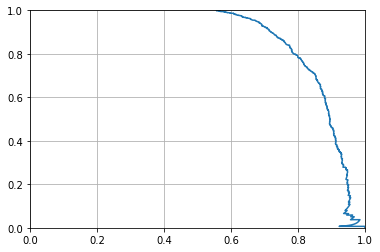

In [45]:
plt.plot(pr,re)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)